In [89]:
"""#1.(5 pts) In 250-500 words, write a thorough explanation in markdown in your notebook of when to use ML and when not to. """
#Do NOT go over the 500-word limit. It is essential to express this concisely. You may need to do additional research on this 
#than what exists in the readings.When determing to use a machine learning algorithim you want to ask yourself a few basic questions 
#to determine if its is appropriate. Machine learning is kind of a fluid solution to awnswers that require complex thinking 
#beyond a yes or no awnswer. Essentially it makes predictions of trends over a given time. For example, AI, language, math 
#propblems, complex multistep approaches to one problem. You wouldn't want to use a problem that can be substituted easily with 
#given outcomes, then it would be more appropriate for if statements.
"""#2(6 pts) Perform pre-processing on the dataset. Clearly use markdown to indicate each pre-processing step you are using.
Note: you should use at least three different techniques. Depending on your dataset you may need to create new columns 
from the existent data you have."""
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
data_df = pd.read_csv("loans_full_schema.csv") 

# Preprocessing Technique 1: Words to Numerical Values
initial_listing_map = {'whole': 1, 'fractional': 2}
data_df['initial_listing_status'] = data_df['initial_listing_status'].map(initial_listing_map)
verified_income_map = {'Verified': 1, 'Not Verified': 0}  
data_df['verified_income'] = data_df['verified_income'].map(verified_income_map)
homeownership_map = {'OWN': 1, 'RENT': 2, 'MORTGAGE': 3}
data_df['homeownership'] = data_df['homeownership'].map(homeownership_map)
# Preprocessing Technique 2: One-hot encoding for complex variables
data_df = pd.get_dummies(data_df, columns=['debt_to_income_joint', 'verification_income_joint'], drop_first=True)

# Preprocessing Technique 3: Handling numerical and categorical
class_labels = LabelEncoder()
data_df['annual_income_joint'] = class_labels.fit_transform(data_df['annual_income_joint'].values)
data_df.head(10)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,...,debt_to_income_joint_39.26,debt_to_income_joint_39.4,debt_to_income_joint_39.41,debt_to_income_joint_39.71,debt_to_income_joint_39.78,debt_to_income_joint_39.79,debt_to_income_joint_39.93,debt_to_income_joint_39.98,verification_income_joint_Source Verified,verification_income_joint_Verified
0,global config engineer,3.0,NJ,3,90000.0,1.0,18.01,596,0,38.0,...,False,False,False,False,False,False,False,False,False,False
1,warehouse office clerk,10.0,HI,2,40000.0,0.0,5.04,596,0,NaN,...,False,False,False,False,False,False,False,False,False,False
2,assembly,3.0,WI,2,40000.0,NaN,21.15,596,0,28.0,...,False,False,False,False,False,False,False,False,False,False
3,customer service,1.0,PA,2,30000.0,0.0,10.16,596,0,NaN,...,False,False,False,False,False,False,False,False,False,False
4,security supervisor,10.0,CA,2,35000.0,1.0,57.96,57,0,NaN,...,False,False,False,False,False,False,False,False,False,True
5,NaN,NaN,KY,1,34000.0,0.0,6.46,596,1,3.0,...,False,False,False,False,False,False,False,False,False,False
6,hr,10.0,MI,3,35000.0,NaN,23.66,423,0,NaN,...,False,False,False,False,False,False,False,False,False,False
7,police,10.0,AZ,3,110000.0,NaN,16.19,596,1,19.0,...,False,False,False,False,False,False,False,False,False,False
8,parts,10.0,NV,3,65000.0,NaN,36.48,596,1,18.0,...,False,False,False,False,False,False,False,False,False,False
9,4th person,3.0,IL,2,30000.0,0.0,18.91,596,0,NaN,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

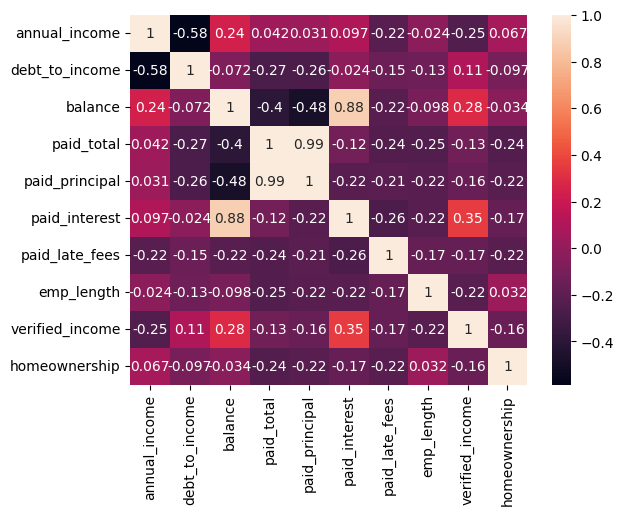

In [90]:
"""#(3 pts) Create a correlation matrix with a heatmap for the features. Use markdown to write about your takeaways 
#in under 200 words. Perform feature selection from this. You should likely not be selecting more than 10 features.""" 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
features = pd.DataFrame({
    'annual_income': loan_df['annual_income'],
    'debt_to_income': loan_df['debt_to_income'],
    'balance': loan_df['balance'],
    'paid_total': loan_df['paid_total'],
    'paid_principal': loan_df['paid_principal'],
    'paid_interest': loan_df['paid_interest'],
    'paid_late_fees': loan_df['paid_late_fees'],
    'emp_length': loan_df['emp_length'],
    'verified_income': data_df['verified_income'],
    'homeownership': data_df['homeownership']
})
features.dtypes
correlation_matrix = features.corr()
sns.heatmap(correlation_matrix.corr(), annot=True)


Time taken to apply the function: 0.000000 seconds
Time taken to apply the function: 0.004823 seconds


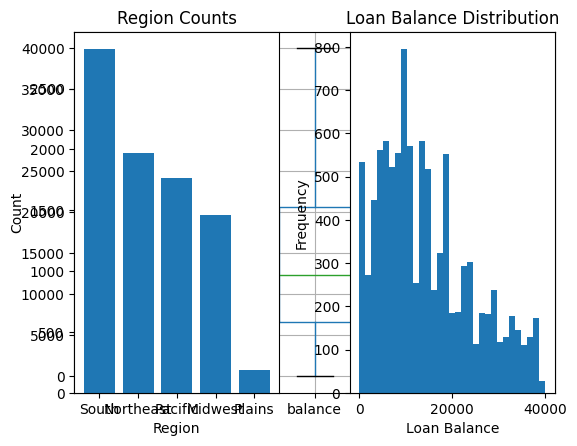

In [91]:
"""#4.(3 pts) Create a box and whisker plot for loan_amounts if using the Lending Club dataset 
and fare if using the Titanic dataset. How do you handle the null values? 
What does this box and whisker plot show you?"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_df = pd.read_csv("loans_full_schema.csv") 
boxplot = data_df.boxplot(column = ['balance'], return_type='axes')
"""#5.(5 pts) If using the Lending Club dataset: create a new column called region that uses a lambda and shows which part of the US someone lives in, 
split up into Pacific, Plains, Midwest, Northeast, and South. If using the Titanic dataset: 
create a new column called age_bin that groups people into at least 4 age ranges. 
#Either use two different lambdas or a lambda and a different technique and see which one is more performant. 
Explain your findings in markdown. (use a timer to determine performance: check useful references below to see how timers work) 
"""
import pandas as pd
state = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 
    'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 
    'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 
    'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 
    'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 
    'VA', 'WA', 'WV', 'WI', 'WY'
]
state_to_region = {
    'Pacific': ['CA', 'OR', 'WA', 'HI', 'AK'],
    'South': ['TX', 'FL', 'GA', 'VA', 'NC', 'SC', 'MD'],
    'Midwest': ['IL', 'OH', 'IN', 'IA', 'MI', 'WI', 'MN', 'ND', 'SD'],
    'Northeast': ['NY', 'NJ', 'PA', 'CT', 'MA', 'RI', 'NH', 'VT'],
    'Plains': ['KS', 'NE', 'MT', 'WY'],
}
start_time = time.time()
def region(state):
    for region, states in state_to_region.items():
        if state in states:
            return region
    return 'Unknown' 
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to apply the function: {elapsed_time:.6f} seconds")
start_time = time.time()
data_df['region'] = data_df['state'].apply(lambda x: region_mapping.get(x, None))
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time taken to apply the function: {elapsed_time:.6f} seconds")
data_df.head(10)

#Using this code I was able to make a regions column that classifies every state into different categories, the output will only read 
#Pacific, South, Midwest, Northeast, or Plains. This way I am able to look at all of the states in a more condensed form and 
#if I ever want to know about what states are in the regions I can just look at what has been defined. I first defined all the 
#states into a list and then used that list to refine it further and assign regions to the abreviations of states. 
#I used the define and if function to put an output if there was an error in my code so that values that didnt fit the 
#categories or did not have a provided state value would return as Unknown rather than NaN. 
#Now I only had one more step and used the lambda to write a quick function that won't override the rest of my code. 
#I had this issue with the 3 techniques for preprocessing. Instead of using two lambda techniques I used a if statement and a lambda.     
"""#*6(3 pts) If using the Lending Club dataset create subplot histograms to show if loan_amounts differ by region.*"""
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
x = data_df['region'].value_counts().index  
y = data_df['region'].value_counts().values 

plt.subplot(1, 2, 1) 
plt.bar(x, y)
plt.title('Region Counts')
plt.xlabel('Region')
plt.ylabel('Count')

x = data_df['balance']  
plt.subplot(1, 2, 2) 
plt.hist(x, bins='auto')
plt.title('Loan Balance Distribution')
plt.xlabel('Loan Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
#I couldn't find any concepts of subplots in your code so I used Wx3 for the format. 


In [92]:
data_df = pd.read_csv("loans_full_schema.csv") 
data_df.head(10)


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,Not Verified,13.12,...,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,NaN,NaN,NaN,...,B5,Jan-2018,Current,whole,Cash,19005.39,1765.84,994.61,771.23,0.0
8,parts,10.0,NV,MORTGAGE,65000.0,Source Verified,36.48,NaN,NaN,NaN,...,C2,Feb-2018,Current,whole,Cash,18156.66,2703.22,1843.34,859.88,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,NaN,NaN,NaN,...,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0
